Stat 131 Project - Group - Big Baller Data
Donald Vu - Ammar Banatwala - Austyn Yamada

Context and Description of Data:

The dataset we will be working with for this project is the FIFA 18 Players Dataset. FIFA 18 is a popular soccer video game that is played on gaming consoles as well as PC's. The dataset has characteristics, traits and attributes of all the players in the game. This dataset is taken from Kaggle.com. Kaggle is a popular website that hosts competitions (with and without monetary prizes) and provides datasets for public use. The data is collected by the website sofifa.com and is the result of multiple hours of accurate and timely webscraping. The dataset is maintained and udpated every week. The implication this has is that we can expect all findings and insights to be very relevant as we are not worried about the data being inaccurate or outdated. The dataset is also a comprehensive list of all the players in the game, so we aren't worried about this being just a representative sample. 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
fifa=pd.read_csv("FIFA18v2.csv")

Exploratory Analysis of Data:
    
Our exploratory analysis is guided by two main questions - 
1) Identifying which variables correlate highly with a players 'Overall' rating. This would let us see which traits and attributes are seemingly more important in determining how good a player is.
2) Identifying which teams are getting more bang for their buck by analyzing the wages they pay their players and the their average 'Overall' player rating. 

In [20]:
rng=list(range(5,7))+ list(range(11,len(fifa.columns)))
attributes=fifa.iloc[:,rng]
print(attributes.head(10))


   Overall  Potential  Special  Acceleration  Aggression  Agility  Balance  \
0       94         94     2161            92          48       90       95   
1       94         94     2228            89          63       89       63   
2       92         93     2105            94          56       96       82   
3       92         92     2321            88          87       86       78   
4       92         92     1487            56          29       51       35   
5       91         93     1465            57          38       60       43   
6       91         92     2234            78          73       82       79   
7       91         91     2151            79          80       78       80   
8       91         91     2122            93          54       93       93   
9       90         90     2189            65          60       71       71   

   Ball Control  Composure  Crossing   ...     Reactions  Short Passing  \
0            96         97        77   ...            95          

In [21]:
#subsetted the dataframe into only attributes and printed out first 10 observations

In [22]:
descriptive=attributes.describe().transpose()
shape=attributes.shape
print(descriptive)
print(shape)

                    count         mean         std    min     25%     50%  \
Overall           18000.0    66.354667    6.857586   49.0    62.0    66.0   
Potential         18000.0    71.333833    6.037602   50.0    67.0    71.0   
Special           18000.0  1596.806667  273.037974  746.0  1455.0  1636.0   
Acceleration      18000.0    64.982222   14.862345   11.0    58.0    68.0   
Aggression        18000.0    55.964389   17.502924   11.0    44.0    59.0   
Agility           18000.0    63.232611   14.713156   14.0    55.0    65.0   
Balance           18000.0    63.925778   13.999942   11.0    56.0    66.0   
Ball Control      18000.0    58.360278   16.750209    8.0    54.0    63.0   
Composure         18000.0    57.814000   13.001210    5.0    51.0    60.0   
Crossing          18000.0    49.906944   18.442414    5.0    38.0    54.0   
Curve             18000.0    47.320667   18.462397    6.0    34.0    49.0   
Dribbling         18000.0    55.252667   18.987840    4.0    48.0    61.0   

Generated descriptive statistics of each column and shape of the data frame. We want to investigate what attributes contribute the most to the 'Overall' rating number. The shape variable indicates there are 18000 rows and 37 columns. This means there are 18000 players in the dataset with 37 traits/characteristics/attributes.

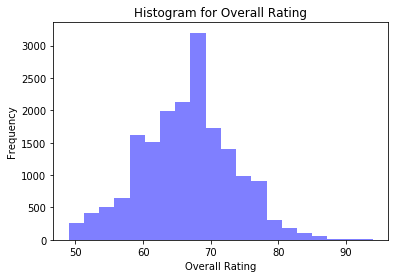

In [23]:
plt.hist(attributes.Overall,bins=20,facecolor='blue',alpha=.5)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Histogram for Overall Rating')
plt.show()

Generated a histogram of our variable of interest Overall Rating

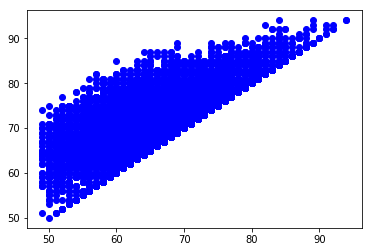

In [24]:
plt.scatter(attributes['Overall'],attributes['Potential'], label='data', color='blue', marker='o')

Based on this scatterplot, it turns out that Potential will always be higher or equal to Overall.
This is because the Potential rating dictates the max Overall rating a player can achieve through development.
As a result, we will exclude Potential from a viable list of predictors of Overall Rating

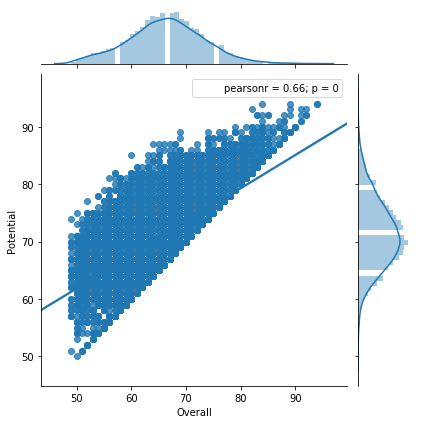

In [76]:
sns.jointplot("Overall", "Potential", data=attributes, kind='reg')

In [25]:
corr = attributes.corr()
print(corr.head(10))

               Overall  Potential   Special  Acceleration  Aggression  \
Overall       1.000000   0.659854  0.604461      0.210802    0.402394   
Potential     0.659854   1.000000  0.383647      0.249293    0.177117   
Special       0.604461   0.383647  1.000000      0.661534    0.674660   
Acceleration  0.210802   0.249293  0.661534      1.000000    0.271539   
Aggression    0.402394   0.177117  0.674660      0.271539    1.000000   
Agility       0.282520   0.233085  0.701772      0.807770    0.250429   
Balance       0.108558   0.139218  0.590814      0.708118    0.198593   
Ball Control  0.449298   0.346633  0.908088      0.688719    0.549303   
Composure     0.633664   0.385337  0.808071      0.444177    0.590764   
Crossing      0.390835   0.242603  0.865236      0.673005    0.476573   

               Agility   Balance  Ball Control  Composure  Crossing    ...     \
Overall       0.282520  0.108558      0.449298   0.633664  0.390835    ...      
Potential     0.233085  0.139218  

 We then created a correlation matrix between all the attributes

In [26]:
by_att=corr.groupby(corr.columns)
overallcorr=by_att['Overall'].sum()
print(overallcorr.head(10))

Acceleration    0.210802
Aggression      0.402394
Agility         0.282520
Balance         0.108558
Ball Control    0.449298
Composure       0.633664
Crossing        0.390835
Curve           0.413601
Dribbling       0.362416
FK Accuracy     0.389572
Name: Overall, dtype: float64


We are only concerned with variables that correlate highly with the Overall variable

In [27]:
highcorr=by_att.filter(lambda g:g['Overall'].abs().sum() >.48)
print(highcorr.iloc[:,0])
highcorrmatrix=corr.loc[['Overall','Special','Composure','Reactions','Short Passing','Vision'],['Overall','Special','Composure','Reactions','Short Passing','Vision']]
highcorrmatrix.style.background_gradient()

Overall          1.000000
Potential        0.659854
Special          0.604461
Composure        0.633664
Reactions        0.840602
Short Passing    0.491155
Vision           0.485516
Name: Overall, dtype: float64


,Overall,Special,Composure,Reactions,Short Passing,Vision
Overall,1,0.604461,0.633664,0.840602,0.491155,0.485516
Special,0.604461,1,0.808071,0.590272,0.906123,0.756246
Composure,0.633664,0.808071,1,0.602478,0.763045,0.647695
Reactions,0.840602,0.590272,0.602478,1,0.468983,0.48559
Short Passing,0.491155,0.906123,0.763045,0.468983,1,0.718995
Vision,0.485516,0.756246,0.647695,0.48559,0.718995,1


Top 5 correlations with Overall(aside from Potential) were Special, Composure, Reactions, Short Passing, Vision
Also created a heatmap with the correlation numbers
Reactions is also a strong trait that seems to linearly increase with the other attributes really well.

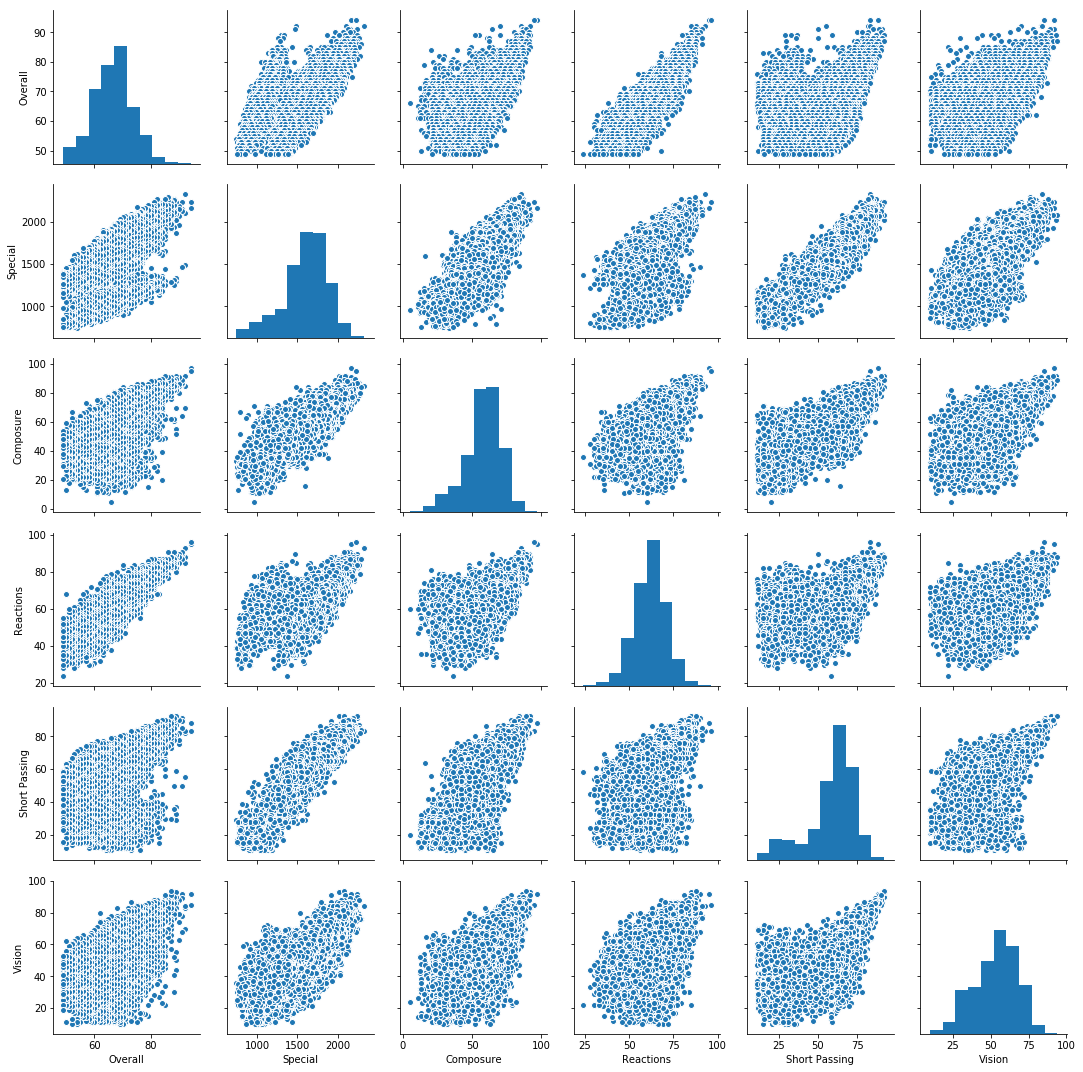

In [28]:
highcorrdata=attributes.loc[:,['Overall','Special','Composure','Reactions','Short Passing','Vision']]
sns.pairplot(highcorrdata)

We then created a pairplot to visually see how each of these predictors are related. There are apparent positive linear relationships among all these predictors

In [29]:
by_club=fifa.groupby('Club')
aggregatorw={'Wage':'mean'}
aggclubw=by_club.agg(aggregatorw)
topavgw=aggclubw.sort_values(by=['Wage'],ascending=False)
top5avgoverallw=topavgw.iloc[0:5,]
top5avgoverallw.columns=['Avg_Wage']
print(top5avgoverallw)

                        Avg_Wage
Club                            
FC Barcelona       208454.545455
Real Madrid CF     147848.484848
Juventus           126600.000000
Manchester City    110000.000000
Manchester United  104000.000000


We will next see if money correlates with skill by comparing these 5 teams to the top 5 average Overall rating. The table above depicts the top 5 teams that have the highest average player wage.

In [30]:
aggregator={'Overall':'mean'}
aggclub=by_club.agg(aggregator)
topavg=aggclub.sort_values(by=['Overall'],ascending=False)
top5avgoverall=topavg.iloc[0:5,]
top5avgoverall.columns=['Avg_Overall']
print(top5avgoverall)

                Avg_Overall
Club                       
FC Barcelona      83.454545
Juventus          82.040000
Napoli            78.600000
Inter             77.565217
Real Madrid CF    77.272727


Looks like FC Barcelona, Juventus, and Real Madrid CF are doing well for themselves.
They are 3 out of the 5 top wage teams that are getting their moneys worth since they also made the top 5 average Overall rating. Both Manchester teams need to rethink their roster and be more careful with handing out large contracts

In [31]:
by_club=fifa.loc[:,['Club','Name','Overall']]
by5club=by_club[by_club.Club.isin(['FC Barcelona', 'Juventus', 'Napoli', 'Inter', 'Real Madrid CF'])]
by5club=by5club.sort_values(by=['Club']).reset_index()
print(by5club.head(10))

   index          Club          Name  Overall
0      0  FC Barcelona      L. Messi       94
1     64  FC Barcelona    I. Rakitić       86
2    218  FC Barcelona   André Gomes       82
3    390  FC Barcelona       Y. Mina       80
4    594  FC Barcelona      L. Digne       79
5     51  FC Barcelona       Iniesta       87
6     49  FC Barcelona         Piqué       87
7    595  FC Barcelona  Paco Alcácer       79
8   3871  FC Barcelona  Sergi Samper       72
9     41  FC Barcelona      Coutinho       87


We next created a dataframe with all observations that fall under the top 5 teams in average Overall

Text(0.5,1,'Boxplot of Top Teams and their Overall Rating Distribution')

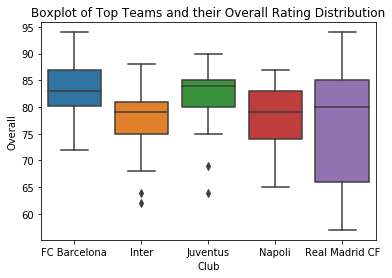

In [32]:
sns.boxplot(x='Club', y="Overall", data=by5club).set_title('Boxplot of Top Teams and their Overall Rating Distribution')

In [33]:
by_cluba=fifa.loc[:,['Club','Name','Wage']]
by5cluba=by_cluba[by_cluba.Club.isin(['FC Barcelona', 'Juventus', 'Manchester City', 'Manchester United', 'Real Madrid CF'])]
by5cluba=by5cluba.sort_values(by=['Club']).reset_index()
print(by5cluba.head(10))

   index          Club          Name      Wage
0      0  FC Barcelona      L. Messi  565000.0
1    594  FC Barcelona      L. Digne  125000.0
2   1590  FC Barcelona   Aleix Vidal  120000.0
3     64  FC Barcelona    I. Rakitić  275000.0
4   3871  FC Barcelona  Sergi Samper   61000.0
5    417  FC Barcelona  Denis Suárez  140000.0
6     51  FC Barcelona       Iniesta  260000.0
7     49  FC Barcelona         Piqué  240000.0
8    111  FC Barcelona     S. Umtiti  175000.0
9     41  FC Barcelona      Coutinho  275000.0


Then created a dataframe with all observations that fall under the top 5 teams in average Wage

Text(0.5,1,'Boxplot of Top Teams and their Overall Wage Distribution')

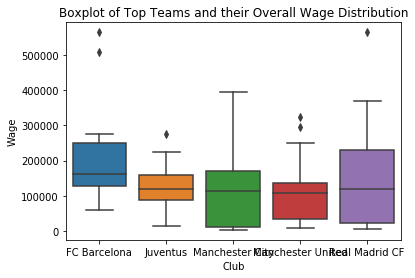

In [34]:
sns.boxplot(x='Club', y="Wage", data=by5cluba).set_title('Boxplot of Top Teams and their Overall Wage Distribution')

Created a boxplot of the distribution of Overall ratings within each top 5 teams
Created a boxplot of the distribution of Wages within each top 5 teams
There seems to be a lot of variance within Real Madrid but it is apparent that their top players can match up with the best of any other team.

Data Modeling:
    
After conducting an exploratory analysis of the data, we proceed to fitting a linear model to investigate which variables play a significant role in determining the wage of a player. We picked a linear model because from our exploratory analysis we observed that the relation between most of the variables was linear (and usually positive). Since the dataset has numerous traits and attributes of players it is important to see which variables are significant/important and should be incorporated into the linear model.  

We first performed feature selection with the Extra Trees Classifier. From this we observed the most important variables were Positioning, Stamina, Ball Control, Short Passing, and Heading Accuracy. Next, we performed feature selection using Univariate Selection. The important variables from this were Long Passing, Crossing, Vision, Dribbling and Penalties. 


In [41]:
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [69]:
sub = fifa.drop(fifa.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)

# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
array = sub.values
X = array[:,1:36]
Y = array[:,0]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
results=pd.DataFrame(model.feature_importances_)
columnnames=pd.DataFrame(list(sub))

features1 = pd.concat([columnnames,results],axis=1)
features1.columns = ['Attributes', 'FeatureImportance']
print(features1.sort_values('FeatureImportance', ascending = False))

          Attributes  FeatureImportance
24       Positioning           0.033641
30           Stamina           0.033331
5       Ball Control           0.033052
26     Short Passing           0.031888
17  Heading Accuracy           0.031472
16       GK Reflexes           0.031415
21        Long Shots           0.031146
4            Balance           0.031069
23         Penalties           0.030937
32          Strength           0.030475
8              Curve           0.030384
15    GK Positioning           0.030037
14        GK Kicking           0.029833
25         Reactions           0.029726
1       Acceleration           0.029699
27        Shot Power           0.029641
19           Jumping           0.029479
11         Finishing           0.029035
33            Vision           0.029029
31   Standing Tackle           0.028997
6          Composure           0.028952
10       FK Accuracy           0.028861
7           Crossing           0.028850
20      Long Passing           0.028571


In [70]:
#Univariate Selection
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = sub.values
X = array[:,1:36]
Y = array[:,0]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

results2 = pd.DataFrame(fit.scores_)
# summarize scores
numpy.set_printoptions(precision=2)

features2 = pd.concat([columnnames,results2],axis=1)
features2.columns = ['Attributes', 'FeatureImportance2']
print(features2.sort_values('FeatureImportance2', ascending = False))

          Attributes  FeatureImportance2
20      Long Passing        22765.916405
7           Crossing        20883.949138
33            Vision        19601.057020
9          Dribbling        17815.322511
23         Penalties        17814.677316
10       FK Accuracy        17361.564327
6          Composure        17088.459166
26     Short Passing        16454.513349
8              Curve        15855.857688
5       Ball Control        15822.857794
4            Balance        15641.489871
19           Jumping        14662.090727
32          Strength        13458.082979
17  Heading Accuracy        13303.371934
25         Reactions        13278.999979
1       Acceleration        12213.682024
16       GK Reflexes        12133.977356
22           Marking        11356.038600
24       Positioning        11243.917116
30           Stamina        10557.785272
21        Long Shots        10074.466946
27        Shot Power         9340.018867
29      Sprint Speed         7575.154644
15    GK Positio

After performing feature selection we proceed to fitting a linear model using relevant variables. From the Extra Trees Classifier Feature Selection we picked 6 variables - "Stamina","Ball Control","Positioning","Short Passing","Heading Accuracy","Long Shots" - that were important. From the Univariate Feature Selection we picked 6 variables - "Long Passing","Crossing","Vision","Dribbling","Penalties","Composure" - that were important.The coefficients in the model can be easily interpreted. For example, for every 1 unit increase in Stamina, there is a -80.58 decrease in a players Wage. For every 1 unit increase in Short Passing, there is a 404.65 increase in a players Wage. The R-Squared for this model is around 0.26, which means that the 6 variables we selected (out of 35) explain around 26% of the variance in a players Wage. The second linear model using variables selected from univariate selection had an almost identical R-sqaured of 26%. We proceed in analyzing the plots of the first linear model as its R-squared is marginally higher than the other moodel. 

In [90]:
from sklearn.linear_model import LinearRegression

#FITTING THE MODEL
model=LinearRegression()
X = fifa[["Stamina","Ball Control","Positioning","Short Passing","Heading Accuracy","Long Shots"]]
y=fifa['Wage']

model.fit(X, y)

#FINDING YHAT, SSR,SST, Rsquared, adjRsquared
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
MSE=SS_Residual/18000
SD=MSE**(1/2)


c={'SSR':SS_Residual,
   'SST':SS_Total,
   'MSE':MSE,
   'SD':SD
  }

regstats=pd.DataFrame(data=c,index=[1])
print(regstats.transpose())

import statsmodels.api as sm
modell=sm.OLS(y,X).fit()
modell.summary()


                1
MSE  4.923719e+08
SD   2.218946e+04
SSR  8.862695e+12
SST  9.839082e+12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1063.
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:46:07   Log-Likelihood:            -2.0587e+05
No. Observations:               18000   AIC:                         4.117e+05
Df Residuals:                   17994   BIC:                         4.118e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Stamina           -206.5680     15.860    -13.024      0.000    -237.655    -175.481
Ball Control        70.6130     32.882      2.147      0.032       6.161     135.065
Positioning        -24.3221     19.811     -1.228      0.220     -63.154      14.510
Short Passing      232.4770     26.819      8.668      0.000     179.909     285.045
Heading Accuracy    36.0741     13.534      2.665      0.008       9.545      62.603
Long Shots         148.6567     18.137      8.196      0.000     113.106     184.208
==============================================================================
Omnibus:                    24011.775   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7706237.110
Skew:                           7.479   Prob(JB):                         0.00
Kurtosis:                     103.256   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
from sklearn.linear_model import LinearRegression

#FITTING THE MODEL
model=LinearRegression()
X = fifa[["Long Passing","Crossing","Vision","Dribbling","Penalties","Composure"]]
y=fifa['Wage']

model.fit(X, y)

#FINDING YHAT, SSR,SST, Rsquared, adjRsquared
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
MSE=SS_Residual/18000
SD=MSE**(1/2)

c={'SSR':SS_Residual,
   'SST':SS_Total,
   'MSE':MSE,
   'SD':SD
  }

regstats=pd.DataFrame(data=c,index=[1])
print(regstats.transpose())

import statsmodels.api as sm
modell=sm.OLS(y,X).fit()
modell.summary()

                1
MSE  4.532284e+08
SD   2.128916e+04
SSR  8.158112e+12
SST  9.839082e+12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1076.
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:46:02   Log-Likelihood:            -2.0584e+05
No. Observations:               18000   AIC:                         4.117e+05
Df Residuals:                   17994   BIC:                         4.117e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Long Passing   -50.8528     19.050     -2.669      0.008     -88.192     -13.514
Crossing        48.2577     19.068      2.531      0.011      10.883      85.632
Vision         104.7024     18.266      5.732      0.000      68.899     140.506
Dribbling      -44.6983     20.908     -2.138      0.033     -85.680      -3.716
Penalties      -82.3430     17.054     -4.828      0.000    -115.770     -48.916
Composure      246.2441     17.426     14.131      0.000     212.087     280.402
==============================================================================
Omnibus:                    24404.461   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8290648.348
Skew:                           7.700   Prob(JB):                         0.00
Kurtosis:                     107.005   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Printed Coefficient Est
#Printed SSR, SST,Rsquared, RsquaredAdj, and MSE

We then proceed to plotting the relationship between Actual and Predicted Wages. We also plot the line of Best Fit. 

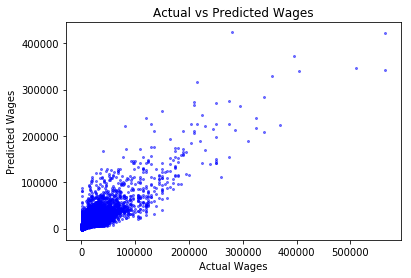

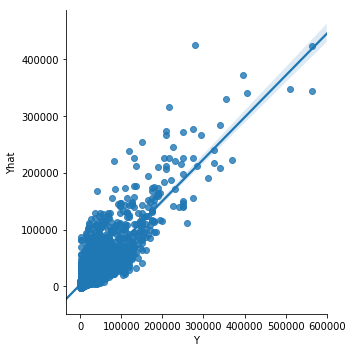

In [74]:
plt.xlabel('Actual Wages')
plt.ylabel('Predicted Wages')
plt.title('Actual vs Predicted Wages')
plt.scatter(y,yhat,c='b',s=4,alpha=0.5)

pred=pd.DataFrame({'Y':y,
                  'Yhat':yhat
                  })

sns.lmplot(x='Y',y='Yhat',data=pred)


In [ ]:
#Created scatterplot of actual vs predicted wages
#Created scatterplot with line of best fit

Text(0.5,0,'Actual Wages')

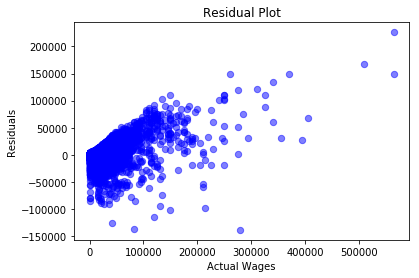

In [45]:
plt.scatter(y,y-yhat,c='b',s=40,alpha=0.5)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Actual Wages')



Text(0.5,0,'Scaled Actual Wages')

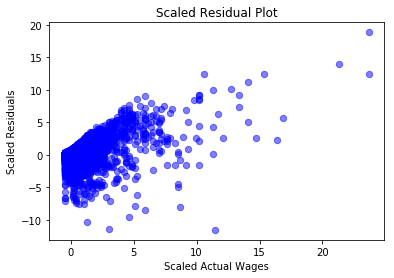

In [46]:
diff=y-yhat

scaley=(y-y.mean())/y.std()
scaleyhat=(diff-diff.mean())/diff.std()
plt.scatter(scaley,scaleyhat,c='b',s=40,alpha=0.5)
plt.title('Scaled Residual Plot')
plt.ylabel('Scaled Residuals')
plt.xlabel('Scaled Actual Wages')

In [38]:
#Printed residual plot 
#Printed residual plot again after scaling variables
#For the most part stays around the center but have a good amount of outliers

Results & Conclusions

From our exploratory analysis we examined which variables correlated highly with a players Total Rating. Found that 'Special', 'Composure', 'Reactions', 'Short Passing', 'Vision' had the highest correlation. We also found out that certain teams are overpaying their players, while some teams have strong rosters while paying their players relatively little. And finally, from our linear model we determined variables that were most important in determining a players wage. We conclude that "Long Passing","Crossing","Vision","Dribbling","Penalties","Composure" are essential traits and play a big role in determining how well a player is paid. 


